early fusion trying to do the next regression problem

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_excel("D:\EVUEME\MAY\MAY_18\Train_Feature.xlsx")

In [3]:
val=pd.read_excel("D:\EVUEME\MAY\MAY_18\Val_Feature.xlsx")
test=pd.read_excel("D:\EVUEME\MAY\MAY_18\Test_Feature.xlsx")

In [4]:
train_video_features = train.iloc[:,10:721]
train_audio_features = train.iloc[:,721:1404]
train_text_features = train.iloc[:,1404:]
train_y=train.iloc[:,4:10]

In [5]:
val_video_features=val.iloc[:,10:721]
val_audio_features=val.iloc[:,721:1404]
val_text_features=val.iloc[:,1404:]
val_y=val.iloc[:,4:10]

In [6]:
test_video_features= test.iloc[:,10:721]
test_audio_features=test.iloc[:,721:1404]
test_text_features=test.iloc[:,1404:]
test_y=test.iloc[:,4:10]

In [7]:
audio_r,audio_feat=train_audio_features.shape
audio_feat

video_r,video_feat=train_video_features.shape
video_feat

text_r,text_feat=train_text_features.shape
text_feat

op_r,op=train_y.shape
op

6

In [8]:
import tensorflow as tf
from tensorflow.keras import Model,Sequential,initializers
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Concatenate
from sklearn.preprocessing import StandardScaler

In [9]:
tf.random.set_seed(42)## taking the seed as 42 

In [10]:
initializer=tf.keras.initializers.GlorotUniform()

In [11]:
## for the audio model 

audio_input=tf.keras.Input(shape=(audio_feat),name="audio_input")
audio_subnetwork=Dense(64)(audio_input)

## for the video 

video_input=tf.keras.Input(shape=(video_feat),name="video_input")
video_subnetwork=Dense(64)(video_input)

## for the text 

text_input=tf.keras.Input(shape=(text_feat),name="text_input")
text_subnetwork=Dense(64)(text_input)

In [12]:
merged=Concatenate()([audio_subnetwork,video_subnetwork,text_subnetwork])

In [13]:
merged=Dense(512,activation='relu',kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(256,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(128,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(64,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(32,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

output_model=Dense(op,activation="sigmoid",kernel_initializer=initializer)(merged)

c:\Python3.9.4inst\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [14]:
final_model=Model(inputs=[audio_input,video_input,text_input],outputs=output_model)

In [15]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_input (InputLayer)       [(None, 683)]        0           []                               
                                                                                                  
 video_input (InputLayer)       [(None, 711)]        0           []                               
                                                                                                  
 text_input (InputLayer)        [(None, 66)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           43776       ['audio_input[0][0]']            
                                                                                              

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
ES=EarlyStopping(patience=10)

In [17]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam()
final_model.compile(loss="mean_absolute_error",optimizer=optimizer)

In [18]:
def scale_datasets(x_train, x_val, x_test):
      """
      Standard Scale test and train data
      Z - Score normalization
      """
      standard_scaler = StandardScaler()
      x_train_scaled = pd.DataFrame(
          standard_scaler.fit_transform(x_train),
          columns=x_train.columns
      )
      x_val_scaled = pd.DataFrame(
          standard_scaler.transform(x_val),
          columns = x_test.columns
      )
      x_test_scaled = pd.DataFrame(
          standard_scaler.transform(x_test),
          columns = x_test.columns
      )
      return x_train_scaled,x_val_scaled, x_test_scaled


In [19]:
train_video_scaled, val_video_scaled, test_video_scaled = scale_datasets(train_video_features, val_video_features ,test_video_features)
train_audio_scaled, val_audio_scaled, test_audio_scaled = scale_datasets(train_audio_features, val_audio_features ,test_audio_features)
train_text_scaled, val_text_scaled, test_text_scaled = scale_datasets(train_text_features, val_text_features ,test_text_features)

In [20]:
history=final_model.fit(
    x=[train_audio_scaled.values,train_video_scaled.values,train_text_scaled.values],
    y=train_y.values,
    validation_data=([val_audio_scaled.values,val_video_scaled.values,val_text_scaled.values],val_y.values),
    epochs=50,   
    callbacks=ES
)

Epoch 1/50
186/186 [==============================] - 2s 6ms/step - loss: 0.1175 - val_loss: 0.1090
Epoch 2/50
186/186 [==============================] - 1s 5ms/step - loss: 0.1055 - val_loss: 0.1024
Epoch 3/50
186/186 [==============================] - 1s 5ms/step - loss: 0.1026 - val_loss: 0.1009
Epoch 4/50
186/186 [==============================] - 1s 5ms/step - loss: 0.1005 - val_loss: 0.1000
Epoch 5/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0992 - val_loss: 0.0988
Epoch 6/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0977 - val_loss: 0.1005
Epoch 7/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0967 - val_loss: 0.1010
Epoch 8/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0958 - val_loss: 0.0994
Epoch 9/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0940 - val_loss: 0.0970
Epoch 10/50
186/186 [==============================] - 1s 5ms/step - loss: 0.0934 - val_loss: 0.1038

train

In [21]:
y_pred=final_model.predict([train_audio_scaled.values,train_video_scaled.values,train_text_scaled.values])

186/186 [==============================] - 0s 2ms/step


In [22]:
mae=mean_absolute_error(train_y.values,y_pred)

In [23]:
mae

0.08110618924654574

In [24]:
big_six=["extraverasion","neurocitism","agreeableness","conscientoiusness","openess","interview"]
for i in range(6):
    print(big_six[i])
    mae=mean_absolute_error(train_y.values[:,i],y_pred[:,i])
    one_mae=1-mae
    print("MAE",mae,"\n","1-MAE",one_mae,"\n")

extraverasion
MAE 0.07960430330152161 
 1-MAE 0.9203956966984784 

neurocitism
MAE 0.07889993902598164 
 1-MAE 0.9211000609740183 

agreeableness
MAE 0.08132170387790466 
 1-MAE 0.9186782961220954 

conscientoiusness
MAE 0.0907258093179385 
 1-MAE 0.9092741906820615 

openess
MAE 0.08113747274452722 
 1-MAE 0.9188625272554728 

interview
MAE 0.07494790721140165 
 1-MAE 0.9250520927885983 



validation

In [25]:
y_pred_validation=final_model.predict([val_audio_scaled.values,val_video_scaled.values,val_text_scaled.values])
mae=mean_absolute_error(val_y.values,y_pred_validation)
mae

63/63 [==============================] - 0s 2ms/step


0.10081306371227959

In [26]:
big_six=["extraverasion","neurocitism","agreeableness","conscientoiusness","openess","interview"]
for i in range(6):
    print(big_six[i])
    mae=mean_absolute_error(val_y.values[:,i],y_pred_validation[:,i])
    one_mae=1-mae
    print("MAE",mae,"\n","1-MAE",one_mae,"\n")

extraverasion
MAE 0.09757415349048353 
 1-MAE 0.9024258465095165 

neurocitism
MAE 0.10336454735713256 
 1-MAE 0.8966354526428675 

agreeableness
MAE 0.09386682678805888 
 1-MAE 0.9061331732119411 

conscientoiusness
MAE 0.1121795406987095 
 1-MAE 0.8878204593012905 

openess
MAE 0.09841900983260489 
 1-MAE 0.9015809901673951 

interview
MAE 0.09947430410668863 
 1-MAE 0.9005256958933113 



test

In [27]:
y_pred_test=final_model.predict([test_audio_scaled.values,test_video_scaled.values,test_text_scaled.values])
mae=mean_absolute_error(test_y.values,y_pred_test)
mae

63/63 [==============================] - 0s 2ms/step


0.10113079955696126

In [28]:
big_six=["extraverasion","neurocitism","agreeableness","conscientoiusness","openess","interview"]
for i in range(6):
    print(big_six[i])
    mae=mean_absolute_error(test_y.values[:,i],y_pred_test[:,i])
    one_mae=1-mae
    print("MAE",mae,"\n","1-MAE",one_mae,"\n")

extraverasion
MAE 0.09837741899588275 
 1-MAE 0.9016225810041173 

neurocitism
MAE 0.10256357077592446 
 1-MAE 0.8974364292240755 

agreeableness
MAE 0.09738308233261149 
 1-MAE 0.9026169176673885 

conscientoiusness
MAE 0.10977523274473457 
 1-MAE 0.8902247672552654 

openess
MAE 0.09974426192504625 
 1-MAE 0.9002557380749537 

interview
MAE 0.09894123056756812 
 1-MAE 0.9010587694324319 



now the work of the classification problem

### CLASSIFICATION FROM THE REGRESSION BASED MODEL

In [29]:
train_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,0.523364,0.552083,0.626374,0.601942,0.488889,0.504673
1,0.345794,0.375000,0.472527,0.582524,0.366667,0.457944
2,0.252336,0.291667,0.406593,0.485437,0.511111,0.373832
3,0.457944,0.489583,0.505495,0.398058,0.377778,0.457944
4,0.607477,0.489583,0.406593,0.621359,0.622222,0.570093
...,...,...,...,...,...,...
5930,0.523364,0.479167,0.626374,0.621359,0.544444,0.588785
5931,0.728972,0.760417,0.582418,0.524272,0.822222,0.616822
5932,0.700935,0.770833,0.747253,0.699029,0.788889,0.691589
5933,0.317757,0.531250,0.582418,0.679612,0.588889,0.616822


In [30]:
data_cluster_new=train_y.values

In [31]:
featuress_b6=["extraversion","neuroticism","agreeableness","conscientiousness","openness","interview"]

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
Kmeans=KMeans(n_clusters=3,random_state=42)
Kmeans.fit(data_cluster_new)

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [34]:
cluster_label=Kmeans.labels_

In [35]:
cluster_label

array([0, 0, 2, ..., 1, 0, 0])

Text(0.5, 0, 'Z')

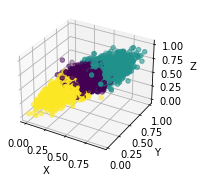

In [36]:
#create a 3d plot
fig=plt.figure()
ax=fig.add_subplot(121,projection='3d')
ax.scatter(data_cluster_new[:, 0], data_cluster_new[:, 1], data_cluster_new[:, 2], c=cluster_label, cmap='viridis')
# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [37]:
cluster_center=Kmeans.cluster_centers_

In [38]:
cluster_ranges=[]
for i in range(3):
    cluster_data=train_y.loc[cluster_label==i]
    cluster_range={
        
        'Min':cluster_data.min(),
        'Max':cluster_data.max()
    }
    cluster_ranges.append(cluster_range)
for i,cluster_range in enumerate(cluster_ranges):
    print(f"cluster{i+1} range:")
    print(pd.DataFrame(cluster_range))
    print()

cluster1 range:
                        Min       Max
extraversion       0.130841  0.719626
neuroticism        0.218750  0.739583
agreeableness      0.252747  0.813187
conscientiousness  0.213592  0.873786
openness           0.255556  0.866667
interview          0.289720  0.691589

cluster2 range:
                        Min       Max
extraversion       0.317757  0.925234
neuroticism        0.375000  0.979167
agreeableness      0.384615  1.000000
conscientiousness  0.300971  0.970874
openness           0.433333  1.000000
interview          0.476636  1.000000

cluster3 range:
                       Min       Max
extraversion       0.00000  0.616822
neuroticism        0.03125  0.552083
agreeableness      0.00000  0.648352
conscientiousness  0.00000  0.708738
openness           0.00000  0.700000
interview          0.00000  0.485981



In [39]:
threshold_Values=[]
for cluster_range in cluster_ranges:
    feature_threshold=[]
    for feature in featuress_b6:
        feature_min=cluster_range['Min'][feature]
        feature_max=cluster_range['Max'][feature]
        thresholdd=(feature_min+feature_max)/2
        feature_threshold.append(thresholdd)
    threshold_Values.append(feature_threshold)

In [40]:
'''
for i,thresholds in enumerate(threshold_Values):
    print(f"Threshold for cluster{i+1}")

    print(thresholds)

print()
'''

for i in range(len(threshold_Values)):
    thresholds=threshold_Values[i]
    print(thresholds[0])
    for i in range(len(threshold_Values[0])):
        feature1=threshold_Values[0][i]
        


0.425233644859813
0.6214953271028034
0.308411214953271


elbow method should performed first to get the correct results

In [41]:

min_cluster=2
max_cluster=10
#data_cluster_new yeh X hai
wcss = []
for n_clusters in range(min_cluster, max_cluster + 1):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(data_cluster_new)
    wcss.append(kmeans.inertia_)
    

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

Text(0.5, 1.0, 'elbow')

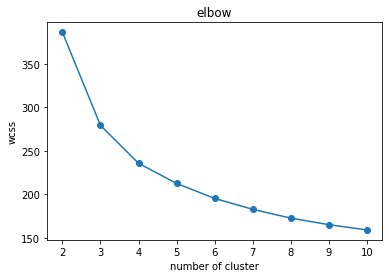

In [42]:
plt.plot(range(min_cluster,max_cluster+1),wcss,marker='o')
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.title("elbow")

In [43]:
for i in range(len(threshold_Values)):
    thresholds=threshold_Values[i]
    print(thresholds)

[0.425233644859813, 0.479166666666666, 0.5329670329670325, 0.543689320388349, 0.5611111111111104, 0.490654205607476]
[0.6214953271028034, 0.6770833333333325, 0.6923076923076921, 0.635922330097087, 0.7166666666666666, 0.7383177570093455]
[0.308411214953271, 0.29166666666666646, 0.324175824175824, 0.3543689320388345, 0.35, 0.242990654205607]


In [44]:
threshold_Values[2][0]

0.308411214953271

In [45]:
## setting for low values
extraverasion_low=threshold_Values[2][0]
neuro_low=threshold_Values[2][1]
agreeable_low=threshold_Values[2][2]
conc_low=threshold_Values[2][3]
openess_low=threshold_Values[2][4]
interview_low=threshold_Values[2][5]


In [46]:
## setting for mid
extraverasion_mid=threshold_Values[0][0]
neuro_mid=threshold_Values[0][1]
agreeable_mid=threshold_Values[0][2]
conc_mid=threshold_Values[0][3]
openess_mid=threshold_Values[0][4]
interview_mid=threshold_Values[0][5]

In [47]:
## setting for high
extraverasion_high=threshold_Values[1][0]
neuro_high=threshold_Values[1][1]
agreeable_high=threshold_Values[1][2]
conc_high=threshold_Values[1][3]
openess_high=threshold_Values[1][4]
interview_high=threshold_Values[1][5]

In [48]:
'''
import pandas as pd

#new one
updated_train_y = train_y
# Iterate over the columns in the train_y DataFrame
for column in train_y.columns:
    low = threshold_Values[2][variables.index(column)]
    mid = threshold_Values[0][variables.index(column)]
    high = threshold_Values[1][variables.index(column)]

    # anonymous
    updated_values = updated_train_y[column].apply(lambda x: 0 if x < low else (1 if x <= mid else 2))
    updated_train_y[column] = updated_values

# Print the updated train_y DataFrame
print("Updated train_y DataFrame:")
updated_train_y
'''

'\nimport pandas as pd\n\n#new one\nupdated_train_y = train_y\n# Iterate over the columns in the train_y DataFrame\nfor column in train_y.columns:\n    low = threshold_Values[2][variables.index(column)]\n    mid = threshold_Values[0][variables.index(column)]\n    high = threshold_Values[1][variables.index(column)]\n\n    # anonymous\n    updated_values = updated_train_y[column].apply(lambda x: 0 if x < low else (1 if x <= mid else 2))\n    updated_train_y[column] = updated_values\n\n# Print the updated train_y DataFrame\nprint("Updated train_y DataFrame:")\nupdated_train_y\n'

In [49]:
variables = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness', 'interview']

In [50]:
'''
import pandas as pd

#new one
updated_train_y = train_y
# Iterate over the columns in the train_y DataFrame
for column in train_y.columns:
    low = threshold_Values[2][variables.index(column)]
    mid = threshold_Values[0][variables.index(column)]
    high = threshold_Values[1][variables.index(column)]

    # anonymous
    updated_values = updated_train_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))
    updated_train_y[column] = updated_values

# Print the updated train_y DataFrame
print("Updated train_y DataFrame:")
updated_train_y
'''


'\nimport pandas as pd\n\n#new one\nupdated_train_y = train_y\n# Iterate over the columns in the train_y DataFrame\nfor column in train_y.columns:\n    low = threshold_Values[2][variables.index(column)]\n    mid = threshold_Values[0][variables.index(column)]\n    high = threshold_Values[1][variables.index(column)]\n\n    # anonymous\n    updated_values = updated_train_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))\n    updated_train_y[column] = updated_values\n\n# Print the updated train_y DataFrame\nprint("Updated train_y DataFrame:")\nupdated_train_y\n'

In [51]:
import pandas as pd

#new one
updated_train_y = train_y
# Iterate over the columns in the train_y DataFrame
for column in train_y.columns:
    low = threshold_Values[2][variables.index(column)]
    mid = threshold_Values[0][variables.index(column)]
    high = threshold_Values[1][variables.index(column)]

    # anonymous
    updated_values = updated_train_y[column].apply(lambda x: 0 if x < low else (2 if x > high else 1))
    updated_train_y[column] = updated_values

# Print the updated train_y DataFrame
print("Updated train_y DataFrame:")
updated_train_y


Updated train_y DataFrame:


,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
5930,1,1,1,1,1,1
5931,2,2,1,1,2,1
5932,2,2,2,2,2,1
5933,1,1,1,2,1,1


In [52]:
updated_train_y.tail(30)

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
5905,0,1,1,1,1,1
5906,1,1,1,1,1,1
5907,1,1,1,1,1,1
5908,1,1,1,1,1,1
5909,1,1,1,1,1,1
5910,1,1,1,2,1,1
5911,1,1,1,0,1,1
5912,1,1,1,1,1,1
5913,1,1,1,0,1,1
5914,2,2,2,2,2,2


for the validation part lets build the dataset

## validation

In [53]:
data_cluster_validation=val_y.values

In [54]:

min_cluster=2
max_cluster=10
#data_cluster_new yeh X hai
wcss = []
for n_clusters in range(min_cluster, max_cluster + 1):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(data_cluster_validation)
    wcss.append(kmeans.inertia_)
    

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

Text(0.5, 1.0, 'elbow')

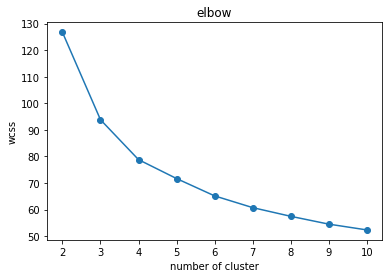

In [55]:
plt.plot(range(min_cluster,max_cluster+1),wcss,marker='o')
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.title("elbow")

In [56]:
Kmeans=KMeans(n_clusters=3,random_state=42)
Kmeans.fit(data_cluster_validation)

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [57]:
cluster_label_val=Kmeans.labels_

Text(0.5, 0, 'Z')

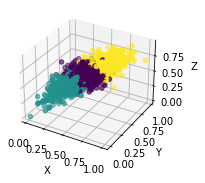

In [58]:
#create a 3d plot
fig=plt.figure()
ax=fig.add_subplot(121,projection='3d')
ax.scatter(data_cluster_validation[:, 0], data_cluster_validation[:, 1], data_cluster_validation[:, 2], c=cluster_label_val, cmap='viridis')
# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [59]:
cluster_center_val=Kmeans.cluster_centers_

In [60]:
cluster_ranges_val=[]
for i in range(3):
    cluster_data_val=val_y.loc[cluster_label_val==i]
    cluster_range_val={
        
        'Min':cluster_data_val.min(),
        'Max':cluster_data_val.max()
    }
    cluster_ranges_val.append(cluster_range_val)
for i,cluster_range_val in enumerate(cluster_ranges_val):
    print(f"cluster{i+1} range:")
    print(pd.DataFrame(cluster_range_val))
    print()

cluster1 range:
                        Min       Max
extraversion       0.121495  0.728972
neuroticism        0.302083  0.760417
agreeableness      0.252747  0.802198
conscientiousness  0.174757  0.864078
openness           0.277778  0.888889
interview          0.299065  0.654206

cluster2 range:
                        Min       Max
extraversion       0.018692  0.514019
neuroticism        0.000000  0.541667
agreeableness      0.021978  0.626374
conscientiousness  0.097087  0.718447
openness           0.033333  0.700000
interview          0.000000  0.485981

cluster3 range:
                        Min       Max
extraversion       0.327103  1.000000
neuroticism        0.479167  0.968750
agreeableness      0.340659  0.934066
conscientiousness  0.359223  1.000000
openness           0.466667  1.000000
interview          0.457944  0.915888



In [61]:
threshold_Values_val=[]
for cluster_range_val in cluster_ranges_val:
    feature_threshold_val=[]
    for feature in featuress_b6:
        feature_min_val=cluster_range_val['Min'][feature]
        feature_max_val=cluster_range_val['Max'][feature]
        thresholdd_val=(feature_min_val+feature_max_val)/2
        feature_threshold_val.append(thresholdd_val)
    threshold_Values_val.append(feature_threshold_val)

In [62]:
for i in range(len(threshold_Values_val)):
    thresholds_val=threshold_Values_val[i]
    print(thresholds_val)

[0.4252336448598131, 0.53125, 0.5274725274725274, 0.5194174757281553, 0.5833333333333334, 0.47663551401869153]
[0.2663551401869159, 0.2708333333333333, 0.3241758241758242, 0.4077669902912622, 0.36666666666666664, 0.24299065420560745]
[0.6635514018691588, 0.7239583333333334, 0.6373626373626373, 0.6796116504854369, 0.7333333333333334, 0.6869158878504672]


In [63]:
'''
import pandas as pd

#new one
updated_val_y = val_y
# Iterate over the columns in the train_y DataFrame
for column in val_y.columns:
    low = threshold_Values_val[0][variables.index(column)]
    mid = threshold_Values_val[1][variables.index(column)]
    high = threshold_Values_val[2][variables.index(column)]

    # anonymous
    updated_values_val = updated_val_y[column].apply(lambda x: 0 if x < low else (1 if x <= mid else 2))
    updated_val_y[column] = updated_values_val

# Print the updated train_y DataFrame
print("Updated val_y DataFrame:")
updated_val_y
'''

'\nimport pandas as pd\n\n#new one\nupdated_val_y = val_y\n# Iterate over the columns in the train_y DataFrame\nfor column in val_y.columns:\n    low = threshold_Values_val[0][variables.index(column)]\n    mid = threshold_Values_val[1][variables.index(column)]\n    high = threshold_Values_val[2][variables.index(column)]\n\n    # anonymous\n    updated_values_val = updated_val_y[column].apply(lambda x: 0 if x < low else (1 if x <= mid else 2))\n    updated_val_y[column] = updated_values_val\n\n# Print the updated train_y DataFrame\nprint("Updated val_y DataFrame:")\nupdated_val_y\n'

In [64]:
'''
import pandas as pd

#new one
updated_val_y = val_y
# Iterate over the columns in the train_y DataFrame
for column in val_y.columns:
    low = threshold_Values_val[1][variables.index(column)]
    mid = threshold_Values_val[0][variables.index(column)]
    high = threshold_Values_val[2][variables.index(column)]

    # anonymous
    updated_values_val = updated_val_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))
    updated_val_y[column] = updated_values_val

# Print the updated train_y DataFrame
print("Updated val_y DataFrame:")
updated_val_y
'''

'\nimport pandas as pd\n\n#new one\nupdated_val_y = val_y\n# Iterate over the columns in the train_y DataFrame\nfor column in val_y.columns:\n    low = threshold_Values_val[1][variables.index(column)]\n    mid = threshold_Values_val[0][variables.index(column)]\n    high = threshold_Values_val[2][variables.index(column)]\n\n    # anonymous\n    updated_values_val = updated_val_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))\n    updated_val_y[column] = updated_values_val\n\n# Print the updated train_y DataFrame\nprint("Updated val_y DataFrame:")\nupdated_val_y\n'

In [65]:
import pandas as pd

#new one
updated_val_y = val_y
# Iterate over the columns in the train_y DataFrame
for column in val_y.columns:
    low = threshold_Values_val[1][variables.index(column)]
    mid = threshold_Values_val[0][variables.index(column)]
    high = threshold_Values_val[2][variables.index(column)]

    # anonymous
    updated_values_val = updated_val_y[column].apply(lambda x: 0 if x < low else (2 if x > high else 1))
    updated_val_y[column] = updated_values_val

# Print the updated train_y DataFrame
print("Updated val_y DataFrame:")
updated_val_y

Updated val_y DataFrame:


,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,2,2,2
3,1,1,1,1,1,1
4,1,1,1,2,1,1
...,...,...,...,...,...,...
1989,1,1,1,0,0,1
1990,1,1,1,1,1,1
1991,2,2,1,2,2,2
1992,1,1,1,1,1,1


In [66]:
updated_val_y.head(40)

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,2,2,2
3,1,1,1,1,1,1
4,1,1,1,2,1,1
5,0,1,1,0,1,1
6,1,1,1,1,1,1
7,1,1,1,1,0,1
8,1,1,1,1,1,1
9,1,1,1,0,1,1


In [67]:
## test dataset 


In [68]:
data_cluster_test=test_y.values

In [69]:

min_cluster=2
max_cluster=10
#data_cluster_new yeh X hai
wcss = []
for n_clusters in range(min_cluster, max_cluster + 1):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(data_cluster_test)
    wcss.append(kmeans.inertia_)
    

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

In [70]:
Kmeans=KMeans(n_clusters=3,random_state=42)
Kmeans.fit(data_cluster_test)

c:\Python3.9.4inst\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [71]:
cluster_label_test=Kmeans.labels_

Text(0.5, 0, 'Z')

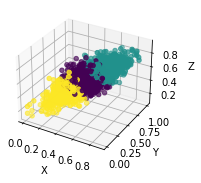

In [72]:
#create a 3d plot
fig=plt.figure()
ax=fig.add_subplot(121,projection='3d')
ax.scatter(data_cluster_test[:, 0], data_cluster_test[:, 1], data_cluster_test[:, 2], c=cluster_label_test, cmap='viridis')
# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [73]:
cluster_center_test=Kmeans.cluster_centers_

In [74]:
cluster_ranges_test=[]
for i in range(3):
    cluster_data_test=test_y.loc[cluster_label_test==i]
    cluster_range_test={
        
        'Min':cluster_data_test.min(),
        'Max':cluster_data_test.max()
    }
    cluster_ranges_test.append(cluster_range_test)
for i,cluster_range_test in enumerate(cluster_ranges_test):
    print(f"cluster{i+1} range:")
    print(pd.DataFrame(cluster_range_test))
    print()

cluster1 range:
                        Min       Max
extraversion       0.186916  0.710280
neuroticism        0.291667  0.718750
agreeableness      0.241758  0.802198
conscientiousness  0.213592  0.854369
openness           0.277778  0.833333
interview          0.308411  0.719626

cluster2 range:
                        Min       Max
extraversion       0.355140  0.897196
neuroticism        0.447917  1.000000
agreeableness      0.461538  0.923077
conscientiousness  0.368932  0.980583
openness           0.377778  0.977778
interview          0.485981  0.943925

cluster3 range:
                        Min       Max
extraversion       0.009346  0.514019
neuroticism        0.010417  0.520833
agreeableness      0.109890  0.692308
conscientiousness  0.087379  0.650485
openness           0.100000  0.744444
interview          0.009346  0.476636



In [75]:
threshold_Values_test=[]
for cluster_range_test in cluster_ranges_test:
    feature_threshold_test=[]
    for feature in featuress_b6:
        feature_min_test=cluster_range_test['Min'][feature]
        feature_max_test=cluster_range_test['Max'][feature]
        thresholdd_test=(feature_min_test+feature_max_test)/2
        feature_threshold_test.append(thresholdd_test)
    threshold_Values_test.append(feature_threshold_test)

In [76]:
for i in range(len(threshold_Values_test)):
    thresholds_test=threshold_Values_test[i]
    print(thresholds_test)

[0.44859813084112143, 0.5052083333333333, 0.5219780219780219, 0.5339805825242719, 0.5555555555555556, 0.514018691588785]
[0.6261682242990654, 0.7239583333333334, 0.6923076923076923, 0.6747572815533981, 0.6777777777777777, 0.7149532710280373]
[0.2616822429906542, 0.265625, 0.4010989010989011, 0.36893203883495146, 0.42222222222222217, 0.2429906542056074]


In [77]:
'''
import pandas as pd

#new one
updated_test_y = test_y
# Iterate over the columns in the train_y DataFrame
for column in test_y.columns:
    low = threshold_Values_test[2][variables.index(column)]
    mid = threshold_Values_test[0][variables.index(column)]
    high = threshold_Values_test[1][variables.index(column)]

    # anonymous
    updated_values_test = updated_test_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))
    updated_test_y[column] = updated_values_test

# Print the updated train_y DataFrame
print("Updated test_y DataFrame:")
updated_test_y
'''

'\nimport pandas as pd\n\n#new one\nupdated_test_y = test_y\n# Iterate over the columns in the train_y DataFrame\nfor column in test_y.columns:\n    low = threshold_Values_test[2][variables.index(column)]\n    mid = threshold_Values_test[0][variables.index(column)]\n    high = threshold_Values_test[1][variables.index(column)]\n\n    # anonymous\n    updated_values_test = updated_test_y[column].apply(lambda x: "low" if x < low else ("high" if x > high else "mid"))\n    updated_test_y[column] = updated_values_test\n\n# Print the updated train_y DataFrame\nprint("Updated test_y DataFrame:")\nupdated_test_y\n'

In [78]:
import pandas as pd

#new one
updated_test_y = test_y
# Iterate over the columns in the train_y DataFrame
for column in test_y.columns:
    low = threshold_Values_test[2][variables.index(column)]
    mid = threshold_Values_test[0][variables.index(column)]
    high = threshold_Values_test[1][variables.index(column)]

    # anonymous
    updated_values_test = updated_test_y[column].apply(lambda x: 0 if x < low else (2 if x > high else 1))
    updated_test_y[column] = updated_values_test

# Print the updated train_y DataFrame
print("Updated test_y DataFrame:")
updated_test_y

Updated test_y DataFrame:


,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
1993,0,0,0,0,1,0
1994,1,1,0,0,1,1
1995,0,1,0,0,1,0
1996,2,1,1,1,1,1


In [79]:
updated_train_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
5930,1,1,1,1,1,1
5931,2,2,1,1,2,1
5932,2,2,2,2,2,1
5933,1,1,1,2,1,1


In [80]:
updated_test_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
1993,0,0,0,0,1,0
1994,1,1,0,0,1,1
1995,0,1,0,0,1,0
1996,2,1,1,1,1,1


In [81]:
updated_val_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,2,2,2
3,1,1,1,1,1,1
4,1,1,1,2,1,1
...,...,...,...,...,...,...
1989,1,1,1,0,0,1
1990,1,1,1,1,1,1
1991,2,2,1,2,2,2
1992,1,1,1,1,1,1


model task

In [82]:
## for the audio model 

audio_input=tf.keras.Input(shape=(audio_feat),name="audio_input")
audio_subnetwork=Dense(128)(audio_input)

## for the video 

video_input=tf.keras.Input(shape=(video_feat),name="video_input")
video_subnetwork=Dense(128)(video_input)

## for the text 

text_input=tf.keras.Input(shape=(text_feat),name="text_input")
text_subnetwork=Dense(128)(text_input)

In [83]:
merged=Concatenate()([audio_subnetwork,video_subnetwork,text_subnetwork])

In [84]:
merged=Dense(1024,activation='relu',kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(512,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(256,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(128,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

merged=Dense(64,activation="relu",kernel_initializer=initializer)(merged)
merged=Dropout(0.2)(merged)

output_model=Dense(6,activation="softmax",kernel_initializer=initializer)(merged)

c:\Python3.9.4inst\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [85]:
final_model=Model(inputs=[audio_input,video_input,text_input],outputs=output_model)

In [86]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_input (InputLayer)       [(None, 683)]        0           []                               
                                                                                                  
 video_input (InputLayer)       [(None, 711)]        0           []                               
                                                                                                  
 text_input (InputLayer)        [(None, 66)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 128)          87552       ['audio_input[0][0]']            
                                                                                            

In [87]:
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [88]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam()
final_model.compile(loss=CategoricalCrossentropy(),optimizer=optimizer,metrics=[Accuracy()])

In [89]:
updated_train_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,0,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
5930,1,1,1,1,1,1
5931,2,2,1,1,2,1
5932,2,2,2,2,2,1
5933,1,1,1,2,1,1


In [90]:
updated_val_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,2,2,2
3,1,1,1,1,1,1
4,1,1,1,2,1,1
...,...,...,...,...,...,...
1989,1,1,1,0,0,1
1990,1,1,1,1,1,1
1991,2,2,1,2,2,2
1992,1,1,1,1,1,1


In [91]:
updated_test_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
1993,0,0,0,0,1,0
1994,1,1,0,0,1,1
1995,0,1,0,0,1,0
1996,2,1,1,1,1,1


In [92]:
updated_train_y.describe()

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000
mean,1.048526,1.081550,1.068745,1.102275,1.073968,0.993766
std,0.562570,0.492705,0.433271,0.622156,0.478124,0.309050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [93]:

history=final_model.fit(
    x=[train_audio_scaled.values,train_video_scaled.values,train_text_scaled.values],
    y=updated_train_y.values,
    validation_data=([val_audio_scaled.values,val_video_scaled.values,val_text_scaled.values],updated_val_y.values),
    epochs=50,   
    callbacks=ES
)

Epoch 1/50
186/186 [==============================] - 4s 15ms/step - loss: 138172792832.0000 - accuracy: 0.1869 - val_loss: 995146661888.0000 - val_accuracy: 0.1983
Epoch 2/50
186/186 [==============================] - 3s 14ms/step - loss: 68594494865408.0000 - accuracy: 0.2006 - val_loss: 185085156392960.0000 - val_accuracy: 0.1983
Epoch 3/50
186/186 [==============================] - 2s 13ms/step - loss: 1836421312675840.0000 - accuracy: 0.2019 - val_loss: 2472399266119680.0000 - val_accuracy: 0.1983
Epoch 4/50
186/186 [==============================] - 3s 14ms/step - loss: 15416548885790720.0000 - accuracy: 0.2033 - val_loss: 13397291486412800.0000 - val_accuracy: 0.1983
Epoch 5/50
186/186 [==============================] - 2s 13ms/step - loss: 74012242244272128.0000 - accuracy: 0.2058 - val_loss: 50191593411444736.0000 - val_accuracy: 0.1983
Epoch 6/50
186/186 [==============================] - 3s 13ms/step - loss: 250428169956360192.0000 - accuracy: 0.2044 - val_loss: 152000748031

In [94]:
score,acc=final_model.evaluate( x=[test_audio_scaled.values,test_video_scaled.values,test_text_scaled.values],
                              y= updated_test_y.values)
print("the accuracy is",acc)

63/63 [==============================] - 0s 4ms/step - loss: 3942637590972203008.0000 - accuracy: 0.2060
the accuracy is 0.20603936910629272


In [95]:
print(updated_train_y.columns)

Index(['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness',
       'openness', 'interview'],
      dtype='object')


In [96]:
# Convert categorical columns to float
updated_train_y['extra1'] = updated_train_y['extraversion'].astype(float)
updated_train_y['neuro1'] = updated_train_y['neuroticism'].astype(float)
updated_train_y['agree1'] = updated_train_y['agreeableness'].astype(float)
updated_train_y['concs1'] = updated_train_y['conscientiousness'].astype(float)
updated_train_y['opene1'] = updated_train_y['openness'].astype(float)


In [98]:
updated_train_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview,extra1,neuro1,agree1,concs1,opene1
0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,0,0,1,1,1,1,0.0,0.0,1.0,1.0,1.0
3,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
4,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5930,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
5931,2,2,1,1,2,1,2.0,2.0,1.0,1.0,2.0
5932,2,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0
5933,1,1,1,2,1,1,1.0,1.0,1.0,2.0,1.0


In [97]:
updated_train_y

,extraversion,neuroticism,agreeableness,conscientiousness,openness,interview,extra1,neuro1,agree1,concs1,opene1
0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,0,0,1,1,1,1,0.0,0.0,1.0,1.0,1.0
3,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
4,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5930,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
5931,2,2,1,1,2,1,2.0,2.0,1.0,1.0,2.0
5932,2,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0
5933,1,1,1,2,1,1,1.0,1.0,1.0,2.0,1.0
